# Covid-19
## Spreading analysis

### source : humdata.org
### source file : https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

In [1]:
#import covid19_tools

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from folium import Map
from folium.plugins import HeatMap, HeatMapWithTime, MiniMap, LocateControl

import math
from datetime import datetime

from tools.analysis_tools import getCountryData, showCountryData, getDataFromDayZero

%matplotlib inline

In [2]:
data_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv", delimiter=",", parse_dates=True, encoding="utf8")
data_death = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv", delimiter=",", parse_dates=True, encoding="utf8")
data_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv", delimiter=",", parse_dates=True, encoding="utf8")
datasets = {
    'confirmed': data_confirmed,
    'death': data_death,
    'recovered': data_recovered
}

In [3]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


In [4]:
data_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,15,16,19,22,22,27,29,29,29,33
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,3


In [5]:
data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,34,34,35,35,35,35,41,42,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,118,118,118,144,144,144,150,191
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,96,96,97,105,105,109,114,114,114,124
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,26,26,26,35,42,42,49,60,75,87


## Covid-19's evolution comparaison

In [6]:
date_columns = data_confirmed.columns[4:]
date_columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20'],
      dtype='object')

### Comparing covid-19's evolution

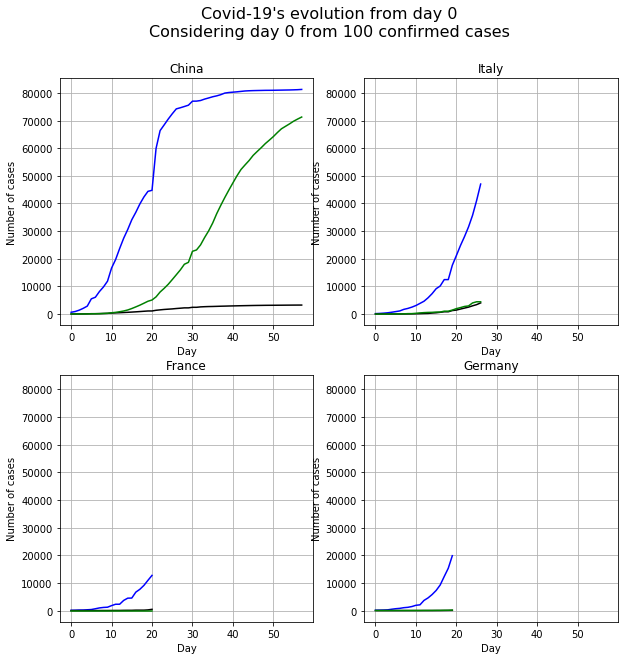

In [7]:
countries = ['China', 'Italy', 'France', 'Germany']
# countries = data_confirmed['Country/Region'].unique().tolist()

threshold = 100 # 100 confirmed cases for a more significant plotting
dicts = {country: getDataFromDayZero(country, datasets, threshold=threshold) for country in countries}

fig, axs = showCountryData(dicts, day_zero=True)
fig.suptitle(f'Covid-19\'s evolution from day 0\nConsidering day 0 from {threshold} confirmed cases', fontsize=16)
plt.show()

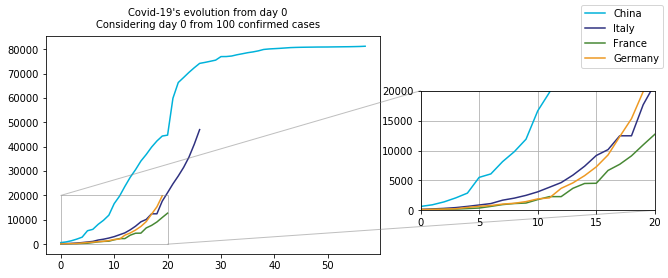

In [8]:
# overlapped version
colors = ['#00b2da', '#2F3180', '#478834', '#ee9922']
fig, ax = plt.subplots()
for (key, subdict), color in zip(dicts.items(), colors):
    ax.plot(list(subdict['confirmed'].keys()), list(subdict['confirmed'].values()), color=color, label=key)
#ax.grid()
fig.legend()
fig.suptitle(f'Covid-19\'s evolution from day 0\nConsidering day 0 from {threshold} confirmed cases', fontsize=10)

def zoomArea():
    # TODO: generalize this function
    x1, x2, y1, y2 = 0, 20, 0, 20000
    axins = ax.inset_axes([1.12, 0.2, 0.7, 0.55])
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)

    for (key, subdict), color in zip(dicts.items(), colors):
        axins.plot(list(subdict['confirmed'].keys())[:x2+1], list(subdict['confirmed'].values())[:x2+1], color=color)
    axins.grid()
    ax.indicate_inset_zoom(axins)
    
zoomArea()
plt.show()

## China analysis

In [9]:
china_data = {
    'China': getCountryData('China', datasets)
}
quarantine_date = datetime.strptime('25/01/2020', '%d/%m/%Y')
max_confirmed = max(china_data['China']['confirmed'].values())

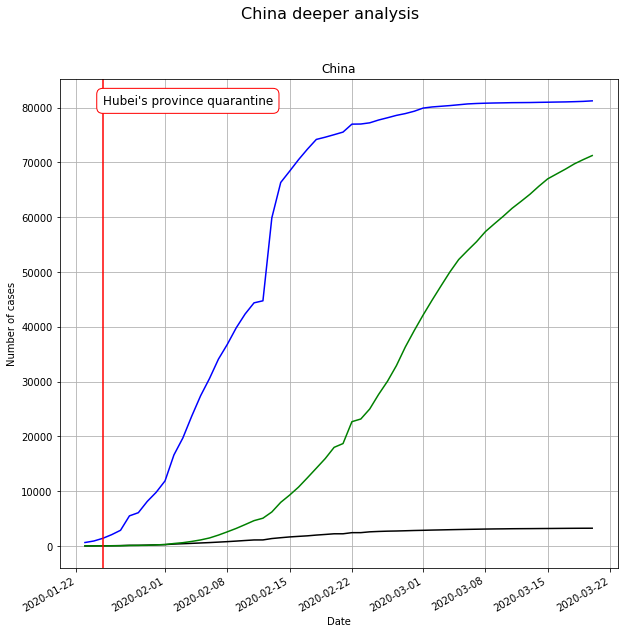

In [10]:
fig, axs = showCountryData(china_data)
fig.suptitle(f'China deeper analysis', fontsize=16)
plt.axvline(quarantine_date, c='red')

plt.text(quarantine_date, max_confirmed, 'Hubei\'s province quarantine',
         {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="red", pad=0.5)})

plt.gcf().autofmt_xdate()
plt.show()

## Heatmap plotting

In [11]:
heat_confirmed = pd.concat([data_confirmed[['Lat', 'Long']], data_confirmed.iloc[:,-1]], axis=1)
heat_confirmed.head()

,Lat,Long,3/20/20
0,15.0000,101.0000,322
1,36.0000,138.0000,963
2,1.2833,103.8333,385
3,28.1667,84.2500,1
4,2.5000,112.5000,1030


In [12]:
# base map
default_location = [0, 0]
default_zoom_start = 1.5
base_map = Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)

In [13]:
# heatmap
heatmap = HeatMap(
    data=heat_confirmed.values.tolist(), 
    name='Confirmed cases',
    min_opacity=0.6,
    radius=10, 
    max_zoom=13
)
heatmap.add_to(base_map)

In [14]:
# some plugins
minimap = MiniMap()
minimap.add_to(base_map)
locate = LocateControl().add_to(base_map)

In [15]:
base_map

In [16]:
# base_map
base_map_time = Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)

In [17]:
# grouping values per date in a list
df_date_list = []
for date_col in date_columns:
    date_values = pd.concat([data_confirmed[['Lat', 'Long']], data_confirmed[date_col]], axis=1).values
    df_date_list.append(date_values)

In [18]:
# heatmaptime
heatMapTime = HeatMapWithTime(df_date_list, radius=5, use_local_extrema=True)
heatMapTime.add_to(base_map_time)

In [19]:
base_map_time